# Sandbox
For playing around during development.

In [1]:
%pylab inline
import pysd
print pysd.__version__
print pysd.__file__
import pandas as pd
import os
os.path.abspath(pysd.__file__)

Populating the interactive namespace from numpy and matplotlib
0.4.2
pysd/__init__.pyc


'/Users/houghton/Google_Drive/Academic Projects/PYSD/pysd/pysd/__init__.pyc'

In [2]:
model = pysd.read_vensim('../../../MIT PhD/Classes/15.879 - SD seminar/Arthur - 1989 - Competing Technologies.mdl')
def rand():
    return np.random.rand()

model.components.rand = rand

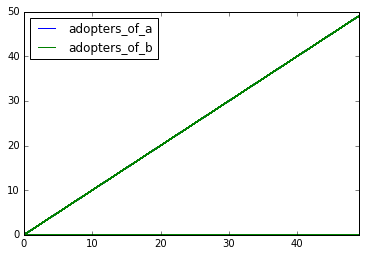

In [12]:
[model.run(return_timestamps=range(50), collect=True) for _ in range(20)]
model.get_record().plot();
model.clear_record()

In [18]:
dir(model.components)

['__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '_adopters_of_a_init',
 '_adopters_of_b_init',
 '_dadopters_of_a_dt',
 '_dadopters_of_b_dt',
 '_dfuncs',
 '_funcs',
 '_state',
 '_stocknames',
 '_t',
 'a_r',
 'a_s',
 'adopters_of_a',
 'adopters_of_b',
 'agents_arriving',
 'b_r',
 'b_s',
 'division',
 'final_time',
 'functions',
 'individuals_adopting_a',
 'individuals_adopting_b',
 'initial_number',
 'initial_time',
 'np',
 'r',
 'r_agents_arriving',
 'r_preference_for_a',
 'r_return_to_a',
 'r_return_to_b',
 'rand',
 's',
 's_agents_arriving',
 's_fraction',
 's_preference_for_b',
 's_return_to_a',
 's_return_to_b',
 'saveper',
 'time',
 'time_step']

(-100, 100)

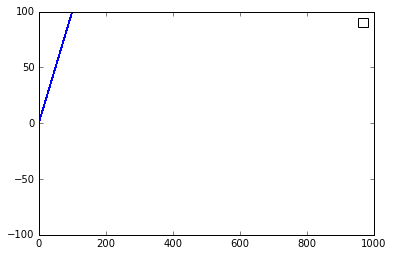

In [83]:
A = []
B = []
n_sim = 1000
for i in range(n_sim):
    res = model.run(params={'r':.1,
                            's':.1,
                            'b_r':1,
                            'b_s':1,
                            'a_r':2,
                            'a_s':2},
           return_timestamps=range(1000))
    A.append(res['adopters_of_a'])
    B.append(res['adopters_of_b'])

Adf = pd.DataFrame(A).T
Adf.columns = range(n_sim)
Bdf = pd.DataFrame(B).T
Bdf.columns = range(n_sim)

(Adf-Bdf).plot(color='b', alpha=.15)
plt.legend([])
plt.ylim(-100,100)

## Increasing returns to adoption

(-100, 100)

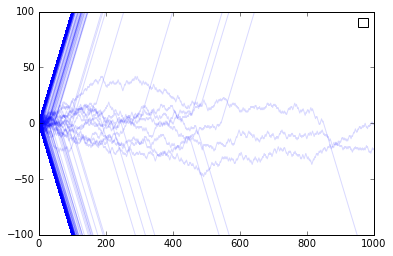

In [70]:
A = []
B = []
n_sim = 1000
for i in range(n_sim):
    res = model.run(params={'r':np.random.exponential(),
                            's':np.random.exponential(),
                            'b_r':np.random.exponential(),
                            'b_s':np.random.exponential(),
                            'a_r':np.random.exponential(),
                            'a_s':np.random.exponential()},
           return_timestamps=range(1000))
    A.append(res['adopters_of_a'])
    B.append(res['adopters_of_b'])

Adf = pd.DataFrame(A).T
Adf.columns = range(n_sim)
Bdf = pd.DataFrame(B).T
Bdf.columns = range(n_sim)

(Adf-Bdf).plot(color='b', alpha=.15)
plt.legend([])
plt.ylim(-100,100)

## Decreasing returns to scale

In [71]:
A = []
B = []
n_sim = 1000
for i in range(n_sim):
    res = model.run(params={'r':-1.* np.random.exponential(),
                            's':-1.* np.random.exponential(),
                            'b_r':np.random.exponential(),
                            'b_s':np.random.exponential(),
                            'a_r':np.random.exponential(),
                            'a_s':np.random.exponential()},
           return_timestamps=range(1000))
    A.append(res['adopters_of_a'])
    B.append(res['adopters_of_b'])

Adf = pd.DataFrame(A).T
Adf.columns = range(n_sim)
Bdf = pd.DataFrame(B).T
Bdf.columns = range(n_sim)

(-100, 100)

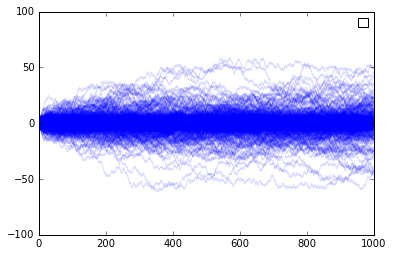

In [72]:
(Adf-Bdf).plot(color='b', alpha=.15)
plt.legend([])
plt.ylim(-100,100)

## Constant returns to Scale

In [75]:
A = []
B = []
n_sim = 1000
for i in range(n_sim):
    params={'r':0,'s':0}
    params['b_r'] = np.random.exponential()
    params['a_r'] = params['b_r'] + np.random.exponential()
    params['a_s'] = np.random.exponential()
    params['b_s'] = params['a_s'] + np.random.exponential()
    
    res = model.run(params,
           return_timestamps=range(1000))
    A.append(res['adopters_of_a'])
    B.append(res['adopters_of_b'])

Adf = pd.DataFrame(A).T
Adf.columns = range(n_sim)
Bdf = pd.DataFrame(B).T
Bdf.columns = range(n_sim)

(-100, 100)

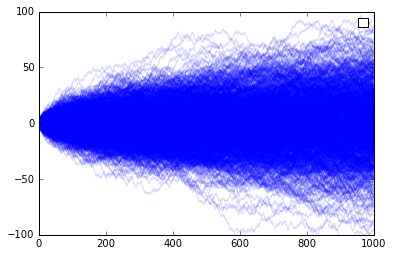

In [76]:
(Adf-Bdf).plot(color='b', alpha=.15)
plt.legend([])
plt.ylim(-100,100)

## When one has negative returns, the other positive...

In [85]:
A = []
B = []
n_sim = 1000
for i in range(n_sim):
    params={'r':1.* np.random.exponential(),'s':-1.* np.random.exponential()}
    params['b_r'] = np.random.exponential()
    params['a_r'] = params['b_r'] + np.random.exponential()
    params['a_s'] = np.random.exponential()
    params['b_s'] = params['a_s'] + np.random.exponential()
    
    res = model.run(params,
           return_timestamps=range(1000))
    A.append(res['adopters_of_a'])
    B.append(res['adopters_of_b'])

Adf = pd.DataFrame(A).T
Adf.columns = range(n_sim)
Bdf = pd.DataFrame(B).T
Bdf.columns = range(n_sim)

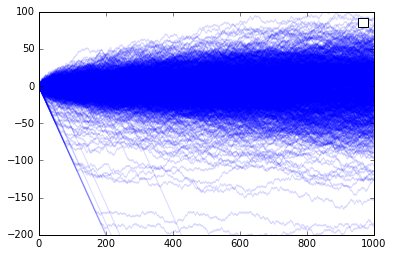

In [87]:
(Adf-Bdf).plot(color='b', alpha=.15)
plt.legend([])
plt.ylim(-200,100);

## When both groups agree that one technology is better

In [89]:
A = []
B = []
n_sim = 1000
for i in range(n_sim):
    params={'r':np.random.exponential(),'s':np.random.exponential()}
    params['b_r'] = np.random.exponential()
    params['a_r'] = params['b_r'] + np.random.exponential()
    params['b_s'] = np.random.exponential() #swapped a and b here so that they are the same direction of preference
    params['a_s'] = params['b_s'] + np.random.exponential()
    
    res = model.run(params,
           return_timestamps=range(1000))
    A.append(res['adopters_of_a'])
    B.append(res['adopters_of_b'])

Adf = pd.DataFrame(A).T
Adf.columns = range(n_sim)
Bdf = pd.DataFrame(B).T
Bdf.columns = range(n_sim)

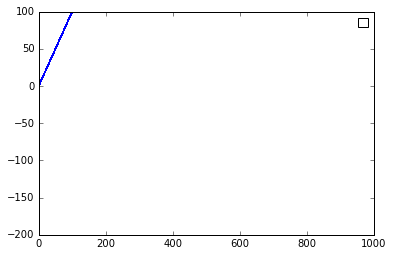

In [90]:
(Adf-Bdf).plot(color='b', alpha=.15)
plt.legend([])
plt.ylim(-200,100);

In [11]:
#mdl_file = 'tests/old_tests/vensim/Teacup.mdl'
# mdl_file = 'tests/test-models/tests/stamps/fasttest.mdl'
mdl_file = 'tests/stamps/pdatvensim8k_RW_v2_Unchanged.mdl'
# mdl_file = 'tests/stamps/basenov9.mdl'
#mdl_file = 'tests/test-models/tests/subscript_2d_arrays/test_subscript_2d_arrays.mdl'
#mdl_file = 'tests/test-models/tests/subscript_individually_defined_1_of_2d_arrays/subscript_individually_defined_1_of_2d_arrays.mdl'
#mdl_file = 'tests/test-models/tests/subscript_individually_defined_1d_arrays/subscript_individually_defined_1d_arrays.mdl'
mdl_file = 'tests/test-models/tests/input_functions/test_inputs.mdl'
model1 = pysd.read_vensim(mdl_file)

In [21]:
model1.run(return_timestamps=np.arange(0,2,.5), return_columns=['test_step'])

,test_step
0.0,0
0.5,0
1.0,1
1.5,1


In [22]:
model1.components.time()

1.5

In [20]:
model2 = pysd.read_vensim(mdl_file)
model2.components.time()
model2.run(return_timestamps=np.arange(0,2,.5), return_columns=['test_step'])

,test_step
0.0,0
0.5,0
1.0,1
1.5,1


In [3]:
stocks=model.run(flatten_subscripts=True)

In [8]:
stocks.to_excel("Fruits Sales.xlsx")

In [1]:
string='abcadwegwe'
string.split(',')

['abcadwegwe']

In [7]:
model.components.onboard_equiv_crew_working_maintenance()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [8]:
np.shape(pysd.functions.shorthander(model.components.effect_on_productivity_of_rate(),
                                    model.components.effect_on_productivity_of_rate.dimension_dir,
                                    model.components.crew_productivity_by_type.dimension_dir,
                                    model.components._subscript_dict)[:,0])

(9L,)

In [9]:
np.shape(pysd.functions.shorthander(model.components.impact_of_skill_on_pdy(),
                                   model.components.impact_of_skill_on_pdy.dimension_dir,
                                   model.components.crew_productivity_by_type.dimension_dir,
                                   model.components._subscript_dict))

(9L, 2L)

In [1]:
from pysd import functions

In [2]:
def time():
    return _t

In [3]:
functions.__builtins__.update({'time':time})

In [4]:
_t = 2
functions.step(10, 4)

0

In [5]:
_t = 5
functions.step(10, 4)

10

In [6]:
from pysd import functions as f2

In [7]:
def time2():
    return _t2
f2.__builtins__.update({'time':time2})

In [8]:
_t2 = 2

f2.step(10, 4)

0

In [9]:
functions.step(10, 4)

0